Regresión no lineal univariada
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/deep-neural-nets/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/deep-neural-nets/tree/master/) para explorar el repositorio usando `nbviewer`. 

---

# Definición del problema

Se desea construir un modelo de regresión no lineal para la siguiente muestra de 31 observaciones de $(x, y)$. 

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

##
## por facilidad se generará una muestra artificial
##
x = np.linspace(start=-3.5, stop=3.5, num=31)
d = np.exp(-x**2)
plt.plot(x, d, 'o');

/Users/jdvelasq/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Metodología de Solución

El perceptrón multicapa se obtiene al agrupar varios perceptrones continuos en capas para luego conectar las capas entre sí, una a continuación de la siguiente. Las neuronas de cada capa se conectan a todas y cada una de las neuronas de la siguiente capa. Solo hay conexiones entre capas adyacentes.

Se consideran tres tipos de capas por su ubicación:


* Capa de entrada: son nodos que simplemente capturan la información de entrada y la transmiten directamente a la siguiente capa sin realizar ningún tipo de procesamiento. Hay tantas neuronas de entrada como variables considere el modelo.


* Capas ocultas de procesamiento: son capas internas usualmente no visibles por el usuario que realizan el procesamiento de la información.


* Capa de salida: Entrega la señal de salida al usuario. Tiene tantas neuronas como variables de salida tenga el sistema.

Un diagrama esquemático para un modelo con dos entradas $(x, y)$, una capa oculta con cuatro neuronas, y una capa de salida con una única neurona es presentado en la figura de abajo.

Un perceptrón multicapa puede aproximar cualquier función arbitraria simplemente agregando neuronas a la capa oculta. En la siguiente figura, se muestran las superficies generadas para por cada una de las cuatro neuronas de la capa oculta, y como al combinarse en la capa de salida producen la figura de la derecha.

![alt](images/MulticapaRegresionUniv-01.png)

Una pregunta fundamental en redes neuronales es la determinación de cuántas capas ocultas y cuántas neuronas por capa oculta deben usarse. En la figura de abajo se presentan las fronteras de decisión para diferentes configuraciones de una red neuronal para resolver un problema de clasificación. Un perceptrón simple puede generar una frontera de decisión lineal; un perceptrón multicapa puede generar una superficie compacta donde la región sombreada representa una clase y el resto de la superficie representa la otra; esto se debe a que la neurona de salida función como una función AND. Esto implica (de forma intuitiva) que un perceptrón con una capa oculta puede aproximar cualquier función continua definida en un dominio compacto

Finalmente, una red con dos capas ocultas puede resolver problemas de clasificación donde los elementos de la clase de interes están aglomerados en distintas regiones (ya no hay un dominio compacto). Podría decirse que cada neurona de la capa oculta es una función AND que se especializa en una región compacta, mientras que la neurona de salida es una función lógica OR.


![alt](images/MulticapaRegresionUniv-02.png)

La estimación de los parámetros óptimos se realiza mediante el método del descenso acelerado, usualmente minimizando el error cuadrático medio, tal como ya se ha realizado en casos anteriores:

$$
\mathbf{w}(k+1) = \mathbf{w}(k) - \mu \frac{\partial}{\partial\mathbf{w}(k)} \left[ e^2(k)\right]
$$

La dificultad subyace en la estimación del gradiente de los pesos de las conexiones respecto al error.

![alt](images/MulticapaRegresionUniv-03.png)

---
**Actividad.--** Realice la derivación del gradiente del perceptrón multicapa que aparece en el documento anexo.

---

### Solución al problema propuesto

In [2]:
## crea el modelo vacio
model = tf.keras.Sequential()

## capa oculta
model.add(tf.keras.layers.Dense(1,                         # una neurona en la capa oculta   
                                activation=tf.nn.sigmoid,  # función de activación
                                input_shape = (1,)))       # una neurona de entrada

## capa de salida
model.add(tf.keras.layers.Dense(1,                         # una neurona de salida
                                activation=tf.nn.sigmoid)) # capa de salida

## reporte de configuración del modelo
model.summary()          

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


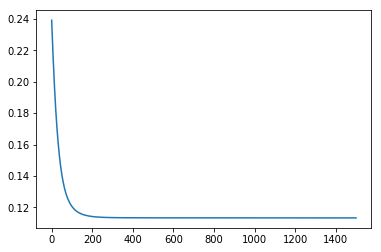

In [3]:
## optimizacion usando gradiente
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

## crea el modelo
model.compile(optimizer=optimizer,     # optimizador
              loss='mse',              # función a minimizar
              metrics=['mse', 'mae'])  # metricas a reportar

## entrena el modelo y guarda 
## el reporte de entrenamiento
history = model.fit(x, d, epochs=1500, verbose=0)

## grafico del error versus la iteración
plt.plot(history.epoch, np.array(history.history['loss']));


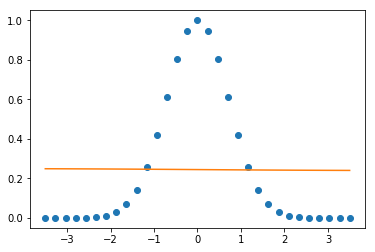

In [4]:
## pronostica para una malla densa del eje X
x_pred = np.linspace(start=-3.5, stop=3.5, num=30)
y_pred = model.predict(x_pred)

## grafico comparativo
plt.plot(x, d, 'o');
plt.plot(x_pred, y_pred);

---
**Ejercicio.--** Si corre las celdas anteriores nuevamente cambia el resultado?

---
**Ejercicio.--** Construya modelos desde una hasta cinco neuronas en la capa oculta. Cuántos parámetros tiene cada modelo? Cuál es el número óptimo de neuronas en la capa oculta? Cómo puede manear el problema relacionado con el punto de arranque?

---

Regresión no lineal univariada
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/deep-neural-nets/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/deep-neural-nets/tree/master/) para explorar el repositorio usando `nbviewer`. 